# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import numpy as np
import scipy

# Import Data

In [3]:
df = pd.read_table("RSAmeans_Glasser_samePOS_allps_tmap_5_2_18_7.5ptile.txt", delim_whitespace=True)

# Look at it

In [4]:
df.head()
# import looks good 

,sub,roi,condition,position,similarity
0,s001,reslice-L-10d-ROI,intact,1,0.40997
1,s001,reslice-L-10d-ROI,random,1,0.16367
2,s001,reslice-L-10d-ROI,scrambled,1,0.07555
3,s001,reslice-L-10pp-ROI,intact,1,0.50819
4,s001,reslice-L-10pp-ROI,random,1,0.45283


# Summarise the data in a way to pass to inferential stats

### These data are from a within subjects fMRI study. I want mean similarity (brain pattern measure) for each subject, roi, and condition. I don't care about position so that's averaged.

In [5]:
sumstats = df.groupby(['sub','roi', 'condition'])['similarity'].mean()

In [6]:
sumstats
# looks good

sub   roi                   condition
s001  reslice-L-1-ROI       intact       0.387218
                            random       0.441920
                            scrambled    0.323002
      reslice-L-10d-ROI     intact       0.278748
                            random       0.098966
                            scrambled    0.164768
      reslice-L-10pp-ROI    intact       0.515934
                            random       0.499796
                            scrambled    0.473290
      reslice-L-10r-ROI     intact       0.426378
                            random       0.381758
                            scrambled    0.459716
      reslice-L-10v-ROI     intact       0.361770
                            random       0.314414
                            scrambled    0.322126
      reslice-L-11l-ROI     intact       0.420826
                            random       0.501960
                            scrambled    0.411130
      reslice-L-13l-ROI     intact       0.309952
            

### Cool so now I have this nested groupby structure.  I want it to be a dataframe again

In [12]:
sumstats = sumstats.unstack().reset_index()
# need to come back and figure out how that worked 

In [13]:
sumstats.head()

condition,sub,roi,intact,random,scrambled
0,s001,reslice-L-1-ROI,0.387218,0.441920,0.323002
1,s001,reslice-L-10d-ROI,0.278748,0.098966,0.164768
2,s001,reslice-L-10pp-ROI,0.515934,0.499796,0.473290
3,s001,reslice-L-10r-ROI,0.426378,0.381758,0.459716
4,s001,reslice-L-10v-ROI,0.361770,0.314414,0.322126


In [100]:
# get rid of condition column
# del sumstats['condition']
# jk I can't....because it's the index? and just happens to be named"

# Funcify your life

### I want to define a function that will take as input an ROI name and two conditions, will compute a permutation based paired samples test, and will output a p value. Here goes. 

In [10]:
def permbabyperm(c1,c2,region):
    # get the differences between the input conditions at the input roi
    diffmeans = sumstats[(sumstats.roi == region)][c1] - sumstats[(sumstats.roi == region)][c2]
    # how many perms you want
    nperm = 10000
    #true group mean
    groupmean = np.mean(diffmeans)
    # make it a numpyarray for later ease 
    groupmean = np.asarray(groupmean)

    # run the perms
    perm_dist = []
    for iperm in range(0,nperm):
        
        # random signs. Probably a better, one line way to do this..
        sign_apply = []
        for isign in enumerate(diffmeans):
            sign_apply.append(np.random.choice((-1, 1)))
        # make it an array
        sign_apply = np.asarray(sign_apply)
        # evaluate the signs and add to the list
        perm_dist.append(np.sum(np.multiply(sign_apply,diffmeans)))
        
    # convert list to nparray
    perm_dist = np.asarray(perm_dist)
    
    #compute the p value for a two tailed test and print it
    pval =  np.sum(np.absolute(perm_dist) >= np.absolute(groupmean))/perm_dist.size
    
    # return the p value
    return pval


In [14]:
permbabyperm('intact','scrambled','reslice-L-1-ROI')
# woohoo it works!

0.9608

### Now I want to make a function that will compute the p value for every ROI and put them all somewhere

In [19]:
# jk maybe next time
# use for loop instead

# takes about 15  minutes so commented out 

therois = sumstats['roi'].unique()
alltheps = []
for iroi in range(0,len(therois)):
    alltheps.append(permbabyperm('intact','random',therois[iroi]))
    # progress
    print('.')

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


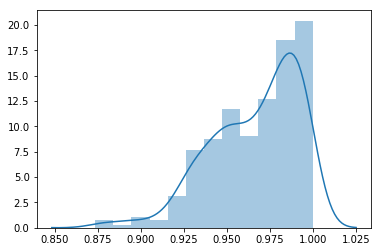

In [20]:
sb.distplot(alltheps)
plt.show()
# not looking super good at this stage.. all p's > .8

In [21]:
np.min(alltheps)

0.8736